# Midterm 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is 100 points.
* You have 120 minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Midterm 2` assignment on Canvas, where you downloaded this. 
* Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers.)
* Your submission should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo - you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `midterm_2_data.xlsx`

This file contains the following sheets:
- for Section 2:
    * `sector stocks excess returns` - MONTHLY excess returns for 49 sector stocks
    * `factors excess returns` - MONTHLY excess returns of AQR factor model from Homework 5
- for Section 3:
    * `factors excess returns` - MONTHLY excess returns of AQR factor model from Homework 5

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 25     |
| 2       | 40     |
| 3       | 35     |

### Each numbered question is worth 5 points unless otherwise specified.

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.1.

Historically, which pricing factor among the ones we studied has shown a considerable decrease in importance?

<span style='color: red;'>

The size factor (SMB) from the Fama-French factor model has shown a relevant decrease in performance.

Traditionally, smaller firms were thought to generate higher returs as compensation for higher risk. The shift probably happened due to larger access to information of smaller firms. When the factor still had positive premium, information for smaller firms was not readily available and not trustworthy. As a consequence, investor were risk averse to them.
As information for smaller firms become more easily available to the overall market, the size factor lost importance.

</span>

### 1.2.

True or False: For a given factor model and a set of test assets, the addition of one more factor to that model will surely decrease the cross-sectional MAE. 

True or False: For a given factor model and a set of test assets, the addition of one more factor to that model will surely decrease the time-series MAE. 

Along with stating T/F, explain your reasoning for the two statements.

<span style='color: red;'>

True: the cross-sectional MAE is the average absolute error of the cross-sectional regression. Thus, by adding another factor to the regression, one should expect an increase in $R^2$ and decrease in MAE. In our exercises, we saw that the cross-sectional MAE is biggest for the CAPM and smallest for the FF5F.

False: the time-series MAE is the average absolute $\alpha$ of all time-series regressions. Increasing the number of factors does not necessarily lead to lower $\alpha$. In our exercises, we saw that the CAPM has the smallest time-series MAE and the FF5F has the biggest.

</span>

### 1.3.

Consider the scenario in which you are helping two people with investments.

* The young person has a 50 year investment horizon.
* The elderly person has a 10 year investment horizon.
* Both individuals have the same portfolio holdings.

State who has the more certain cumulative return and explain your reasoning.

<span style='color: red;'>

We are more certain about the cumulative return of the elderly person.

This is the case because the level of certainty about a given statistics is a consequence of the standard deviation of the statistic.

As stated in lecture, for returns with no auto-correlation, variance scales linearly with time. Thus,

$$
\sigma_{\text{year}} = \sqrt{12} \times \sigma_{\text{month}}
$$

Meaning that

$$
\sigma_{\text{50 years}} = \sqrt{12 \times 50} \times \sigma_{\text{month}}
$$

$$
\sigma_{\text{10 years}} = \sqrt{12 \times 10} \times \sigma_{\text{month}}
$$

Thus, the volatility (and variance) of 10-year cummulative return is lower than the volatility (and variance) of 50-year cummulative return.

It is worth to mention that, on the other hand, we are more certain about the average return for the longer horizon, given the bigger sample size (nonetheless, the question is about cummulative returns).

</span>

### 1.4.

Suppose we find that the 10-year bond yield works well as a new pricing factor, along with `MKT`.

Consider two ways of building this new factor.
1. Directly use the index of 10-year yields, `YLD`
1. Construct a Fama-French style portfolio of equities, `FFYLD`. (Rank all the stocks by their correlation to bond yield changes, and go long the highest ranked and shor tthe lowest ranked.)

Could you test the model with `YLD` and the model with `FFYLD` in the exact same ways? Explain.

<span style='color: red;'>

No. You can only test the model including `YLD` with the cross-sectional test. You can test the model with `FFYLD` with either the cross-sectional test or the time-series test.

The first model is not testable with the time-series test because the index of 10-year yield is not a tradable asset. The situation is similar to the CCAPM (Consumption CAPM), in which we use level of consumption as a factor in the model.

</span>

### 1.5.

Suppose we implement a momentum strategy on cryptocurrencies rather than US stocks.

Conceptually speaking, but specific to the context of our course discussion, how would the risk profile differ from the momentum strategy of US equities?

<span style='color: red;'>

Using a momentum strategy with cryptocurrencies instead of US stocks would lead to:
- Higher idyosincratic risk: there are more US stocks than cryptoassets. Therefore, going long on the 10% biggest returns and short on the 10% smaller returns would lead to a smaller number of holdings in a cryptocurrency strategy than in a stock strategy.
- Higher volatility: cryptocurrencies are more volatile than US stocks. Thus, we should expect a momentum strategy with those to also be more volatile.
- Higher liquidity risk: some cryptocurrencies have low liquidity. As a consequence, it becomes challenging to execute large trades without significantly impacting the market price.
- Higher momentum: the lower liquidity of some cryptocurrencies can lead to less market makers, possibly allowing for higher autocorrelation in the returns. If that is the case, momentum strategies in the market should perform better when compared to the US stock momentum strategy.
</span>

***

# 2. Pricing and Tangency Portfolio

You work in a hedge fund that believes that the AQR 4-Factor Model (present in Homework 5) is the perfect pricing model for stocks.

$$
\mathbb{E} \left[ \tilde{r}^i \right] = \beta^{i,\text{MKT}} \mathbb{E} \left[ \tilde{f}_{\text{MKT}} \right] + \beta^{i,\text{HML}} \mathbb{E} \left[ \tilde{f}_{\text{HML}} \right] + \beta^{i,\text{RMW}} \mathbb{E} \left[ \tilde{f}_{\text{RMW}} \right] + \beta^{i,\text{UMD}} \mathbb{E} \left[ \tilde{f}_{\text{UMD}} \right]
$$

The factors are available in the sheet `factors excess returns`.

The hedge fund invests in sector-tracking ETFs available in the sheet `sectors excess returns`. You are to allocate into these sectors according to a mean-variance optimization with...

* regularization: elements outside the diagonal covariance matrix divided by 2.
* modeled risk premia: expected excess returns given by the factor model rather than just using the historic sample averages.

You are to train the portfolio and test out-of-sample. The timeframes should be:
* Training timeframe: Jan-2018 to Dec-2022.
* Testing timeframe: Jan-2023 to most recent observation.

In [1]:
import sys
sys.path.insert(0,'../../cmds')

import portfolio_management_helper as pmh

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re


FILEIN = "data/midterm_2_data.xlsx"
STOCKS_SHEET = "sector excess returns"
FACTORS_SHEET = "factors excess returns"

stocks_excess_returns = pmh.read_excel_default(FILEIN, sheet_name=STOCKS_SHEET)
factors_excess_returns = pmh.read_excel_default(FILEIN, sheet_name=FACTORS_SHEET)

AQR_FACTORS = ['MKT', 'RMW', 'HML', 'UMD']

COV_MATRIX = 1/2
TESTING_FACTOR_PREMIA = False

USE_INTERCEPT = False
TRAINING_START = "2018"
TRAINING_END = "2022"
TESTING_START = "2023"
TESTING_END = "2024"

SAMPLE_ETFS = ['Agric', 'Food', 'Soda']

aqr_factors_excess_returns = factors_excess_returns[AQR_FACTORS]

### 2.1.
(8pts)

Calculate the model-implied expected excess returns of every asset.

The time-series estimations should...
* NOT include an intercept. (You assume the model holds perfectly.)
* use data from the `training` timeframe.

With the time-series estimates, use the `training` timeframe's sample average of the factors as the factor premia. Together, this will give you the model-implied risk premia, which we label as
$$
\lambda_i := \mathbb{E}[\tilde{r}_i]
$$

* Store $\lambda_i$ and $\boldsymbol{\beta}^i$ for each asset.
* Print $\lambda_i$ for `Agric`, `Food`, `Soda`

In [2]:
training_stocks_excess_returns = stocks_excess_returns.loc[TRAINING_START:TRAINING_END]
training_aqr_factors_excess_returns = aqr_factors_excess_returns.loc[TRAINING_START:TRAINING_END]

testing_stocks_excess_returns = stocks_excess_returns.loc[TESTING_START:TESTING_END]
testing_aqr_factors_excess_returns = aqr_factors_excess_returns.loc[TESTING_START:TESTING_END]

if TESTING_FACTOR_PREMIA:
    factor_premia_returns = testing_aqr_factors_excess_returns.copy()
else:
    factor_premia_returns = training_aqr_factors_excess_returns.copy()

iterative_factor_regressions = (
    pmh.calc_iterative_regression(
        training_stocks_excess_returns,
        training_aqr_factors_excess_returns,
        intercept=USE_INTERCEPT,
        keep_columns=["Beta", "Alpha"],
        drop_columns=["Annualized Alpha"],
        warnings=False
    )
    .reset_index()
    .assign(index=lambda df: df['index'].map(lambda x: x.replace(' no Intercept', '')))
    .rename({'index': None}, axis=1)
    .set_index(None)
)

premia_and_expected_excess_returns = (
    iterative_factor_regressions
    .assign(**{
        f"{factor} Premia": (lambda df, factor=factor: df[f"{factor} Beta"] * factor_premia_returns[f"{factor}"].mean())
        for factor in AQR_FACTORS
    })
    .assign(**{"Expected Return": lambda df: df[
        [f + " Premia" for f in AQR_FACTORS]
    ].sum(axis=1)})
    .drop('Alpha', axis=1)
    .assign(**{
        f"Annualized {premia}": (lambda df, premia=premia: df[f"{premia}"] * 12)
        for premia in [f + " Premia" for f in AQR_FACTORS] + ["Expected Return"]
    })
)

(
    premia_and_expected_excess_returns
    .iloc[:3]
    .loc[:, ['Expected Return', 'Annualized Expected Return']]
)

,Expected Return,Annualized Expected Return
Agric,0.0037,0.0439
Food,0.0055,0.0655
Soda,0.0073,0.0880


In [3]:
stocks_expected_excess_return = premia_and_expected_excess_returns['Expected Return']

### 2.2.

Use the expected excess returns derived from (2.1) with the **regularized** covariance matrix to calculate the weights of the tangency portfolio.

- Use the covariance matrix only for `training` timeframe.
- Calculate and store the vector of weights for all the assets.
- Return the weights of the tangency portfolio for `Agric`, `Food`, `Soda`.

$$
\textbf{w}_{t} = \dfrac{\tilde{\Sigma}^{-1} \bm{\lambda}}{\bm{1}' \tilde{\Sigma}^{-1} \bm{\lambda}}
$$

Where $\tilde{\Sigma}^{-1}$ is the regularized covariance-matrix.

In [4]:
training_tangency_weights_expected_returns = pmh.calc_tangency_weights(
    training_stocks_excess_returns,
    cov_mat=COV_MATRIX,
    expected_returns=stocks_expected_excess_return,
    name="AQR Expected Returns"
)
training_tangency_weights_expected_returns.iloc[:3]

,AQR Expected Returns Weights
Agric,-0.0307
Food,0.0153
Soda,0.1329


### 2.3.

Evaluate the performance of this allocation in the `testing` period. Report the **annualized**
- mean
- vol
- Sharpe

In [5]:
aqr_portfolio = pmh.create_portfolio(
    testing_stocks_excess_returns,
    training_tangency_weights_expected_returns.iloc[:, 0].to_dict(),
    port_name="AQR Portfolio"
)
aqr_portfolio.tail(3)
aqr_portfolio_statistics = pmh.calc_summary_statistics(
    aqr_portfolio,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"],
)
aqr_portfolio_statistics

,Annualized Mean,Annualized Vol,Annualized Sharpe
AQR Portfolio,0.1812,0.1195,1.5155


### 2.4.

(7pts)

Construct the same tangency portfolio as in `2.2` but with one change:
* replace the risk premia of the assets, (denoted $\lambda_i$) with the sample averages of the excess returns from the `training` set.

So instead of using $\lambda_i$ suggested by the factor model (as in `2.1-2.3`) you're using sample averages for $\lambda_i$.

- Return the weights of the tangency portfolio for `Agric`, `Food`, `Soda`.

Evaluate the performance of this allocation in the `testing` period. Report the **annualized**
- mean
- vol
- Sharpe

In [6]:
training_tangency_weights_historical_returns = pmh.calc_tangency_weights(
    training_stocks_excess_returns,
    cov_mat=COV_MATRIX,
    name="Historical"
)
(
    pd.concat([
        training_tangency_weights_historical_returns, training_tangency_weights_expected_returns
    ], axis=1)
    .iloc[:3]
)

,Historical Weights,AQR Expected Returns Weights
Agric,0.1441,-0.0307
Food,-0.0698,0.0153
Soda,0.3227,0.1329


In [7]:
historical_returns_portfolio = pmh.create_portfolio(
    testing_stocks_excess_returns,
    training_tangency_weights_historical_returns.iloc[:, 0].to_dict(),
    port_name="Historical Returns Portfolio"
)
historical_returns_portfolio.tail(3)
historical_returns_portfolio_statistics = pmh.calc_summary_statistics(
    historical_returns_portfolio,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"],
)
pd.concat([
    historical_returns_portfolio_statistics,
    aqr_portfolio_statistics
])

,Annualized Mean,Annualized Vol,Annualized Sharpe
Historical Returns Portfolio,0.1768,0.1530,1.1555
AQR Portfolio,0.1812,0.1195,1.5155


### 2.5.

Which allocation performed better in the `testing` period: the allocation based on premia from the factor model or from the sample averages?

Why might this be?

<span style='color: red;'>

The allocation based on the premia from the factor model performs better than the sample averages.

Generally, we can state that historical returns are bad proxy for expected future returns.

On the other hand, generally, historical returns of factors are a better proxy for expected future factor returns. Expected returns (expected premia) of factor models are model stable, leading to better prediction of stock returns, conditional on the stability in the relationship between the factors and the assets ($\beta_i$). Focusing on factor estimation allows us to estimate the systematic risk component of assets, which is considered the only risk that has a premium.

The fact that the expected return model outperformed the historical return model does not imply that the factor model is a perfect pricing model.

**Extra**
- Numerous studies have demonstrated that portfolios constructed using factor-based expected returns outperform those using historical returns, particularly out-of-sample.
- Expected returns from factor models tend to be less extreme compared to historical averages of assets. Thus the expected return of assets also tend to be less extreme when using the factor-based model, thus providing less instability in the Mean-Variance optimization.

</span>

### 2.6.
Suppose you now want to build a tangency portfolio solely from the factors, without using the sector ETFs.

- Calculate the weights of the tangency portfolio using `training` data for the factors.
- Again, regularize the covariance matrix of factor returns by dividing off-diagonal elements by 2.

Report, in the `testing` period, the factor-based tangency stats **annualized**...
- mean
- vol
- Sharpe


In [8]:
pmh.calc_summary_statistics(
    pmh.create_portfolio(
        testing_aqr_factors_excess_returns,
        pmh.calc_tangency_weights(
            training_aqr_factors_excess_returns, cov_mat=COV_MATRIX,
            expected_returns=training_aqr_factors_excess_returns.mean()
        ).iloc[:, 0].to_dict(),
        port_name="Tangency Portfolio Factors"
    ),
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"],
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio Factors,0.0624,0.0582,1.0719


### 2.7.

Based on the hedge fund's beliefs, would you prefer to use the ETF-based tangency or the factor-based tangency portfolio? Explain your reasoning. Note that you should answer based on broad principles and not on the particular estimation results.

<span style='color: red;'>

I would prefer to use the ETF-based tangency. The fact that the tangency portfolio with factors performs significantly worst than the ETF-based tangency is evidence that the AQR pricing factor model is probably not a perfect pricing model.

If the AQR pricing model was the perfect pricing model, a tangency portfolio only with the factors should produce the best adjusted by risk return out-of-sample. This sample, as well as our analysis in homework, shows that neither the AQR nor other factor models showcased perform well in the cross-sectional or time-series tests. Thus, the addition of other assets to the portfolio might can help include systematic risk with premium to the portfolio, possibly increasing the out-of-sample Sharpe.

</span>

***

# 3. Long-Run Returns

For this question, use only the sheet `factors excess returns`.

Suppose we want to measure the long run returns of various pricing factors.

### 3.1.

Turn the data into log returns.
- Display the first 5 rows of the data.

Using these log returns, report the **annualized**
* mean
* vol
* Sharpe

In [9]:
factors = pd.read_excel(FILEIN, sheet_name=FACTORS_SHEET, index_col=0)
factors_log = np.log(factors + 1)
factors_log.head()

,MKT,HML,RMW,UMD
date,,,,
1980-01-01,0.0536,0.0173,-0.0171,0.0728
1980-02-01,-0.0123,0.0061,0.0004,0.0758
1980-03-01,-0.1381,-0.0102,0.0145,-0.1004
1980-04-01,0.0389,0.0105,-0.0212,-0.0043
1980-05-01,0.0513,0.0038,0.0034,-0.0113


In [10]:
summary = factors_log.agg(['mean', 'std']).T
summary['sharpe'] = summary['mean'] / summary['std']
summary['mean'] = summary['mean'] * 12
summary['std'] = summary['std'] * np.sqrt(12)
summary['sharpe'] = summary['sharpe'] * np.sqrt(12)
summary

,mean,std,sharpe
MKT,0.0735,0.1588,0.4630
HML,0.0198,0.1098,0.1801
RMW,0.0435,0.0836,0.5210
UMD,0.0501,0.1604,0.3122


### 3.2.

Consider 15-year cumulative log excess returns. Following the assumptions and modeling of Lecture 6, report the following 15-year stats:
- mean
- vol
- Sharpe

How do they compare to the estimated stats (1-year horizon) in `3.1`? 

In [11]:
# To get the 15 year stats, just multiply the mean by 15, the std by sqrt(15), and the sharpe by sqrt(15)
summary_15 = summary.copy()
summary_15['mean'] = summary_15['mean'] * 15
summary_15['std'] = summary_15['std'] * np.sqrt(15)
summary_15['sharpe'] = summary_15['sharpe'] * np.sqrt(15)
summary_15

,mean,std,sharpe
MKT,1.1032,0.6152,1.7933
HML,0.2965,0.4252,0.6975
RMW,0.6531,0.3237,2.0177
UMD,0.7514,0.6214,1.2093


### 3.3.

What is the probability that momentum factor has a negative mean excess return over the next 
* single period?
* 15 years?

In [16]:
# Calculate the normal distribution of mom and mkt
from scipy.stats import norm

def prob(mu, sigma, h):
    return norm.cdf(np.sqrt(h)*mu/sigma)

# Single period
prob_1_month = 1 - prob(summary.loc['UMD', 'mean'], summary.loc['UMD', 'std'], 1 / 12)

# 15 year
prob_15_year = 1 - prob(summary.loc['UMD', 'mean'], summary.loc['UMD', 'std'], 15)

# Print
print(f"Probability of positive UMD in a single month: {prob_1_month:.2%}")
print(f"Probability of positive UMD in 15 years: {prob_15_year:.6%}")

Probability of positive UMD in a single month: 46.41%
Probability of positive UMD in 15 years: 11.326775%


### 3.4.

Recall from the case that momentum has been underperforming since 2009. 

Using data from 2009 to present, what is the probability that momentum *outperforms* the market factor over the next
* period?
* 15 years?

In [13]:
# Build a UMD - MKT portfolio
umd_mkt_spread = factors_log['UMD'] - factors_log['MKT']
umd_mkt_spread = umd_mkt_spread.loc['2009':]

umd_mkt_mean = umd_mkt_spread.mean() * 12
umd_mkt_std = umd_mkt_spread.std() * np.sqrt(12)

prob_outperf_1_month = prob(umd_mkt_mean, umd_mkt_std, 1 / 12)
prob_outperf_15_year = prob(umd_mkt_mean, umd_mkt_std, 15)

print(f"Probability of UMD outperforming the market in a single month: {prob_outperf_1_month:.2%}")
print(f"Probability of UMD outperforming the market in 15 years: {prob_outperf_15_year:.2%}")

Probability of UMD outperforming the market in a single month: 43.45%
Probability of UMD outperforming the market in 15 years: 1.35%


### 3.5.
Conceptually, why is there such a discrepancy between this probability for 1 period vs. 15 years?

What assumption about the log-returns are we making when we use this technique to estimate underperformance?

<font color='red'>

Assumption: Log-returns are independent and identically distributed (i.i.d.).

Discrepancy: Since mean is growing linearly, we can think of thing as the possible distributions diverging from each other (in cumulative return space), leading to a higher probability of outperformance in the long run.

Below is a demo:

</font>

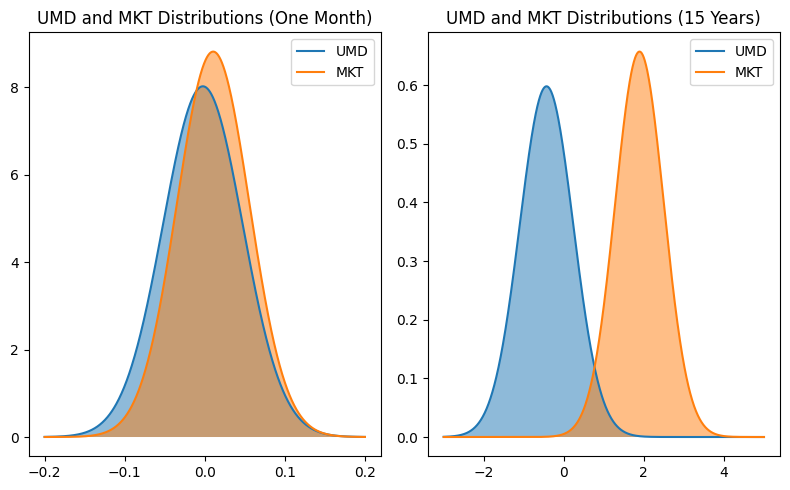

In [14]:
factors_2009 = factors_log.loc['2009':]
umd_2009 = factors_2009['UMD']
mkt_2009 = factors_2009['MKT']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

xxs15 = np.linspace(-3., 5., 1000)
xxs = np.linspace(-0.2, 0.2, 1000)

# Plot a normal distribution with mean of UMD
pdf_umd = norm.pdf(xxs, umd_2009.mean(), umd_2009.std())
pdf_mkt = norm.pdf(xxs, mkt_2009.mean(), mkt_2009.std())
axes[0].plot(xxs, pdf_umd, label='UMD', )
axes[0].plot(xxs, pdf_mkt, label='MKT')
axes[0].fill_between(xxs, pdf_umd, alpha=0.5)
axes[0].fill_between(xxs, pdf_mkt, alpha=0.5)
axes[0].legend()
axes[0].set_title('UMD and MKT Distributions (One Month)')

pdf_umd_15 = norm.pdf(xxs15, umd_2009.mean() * 15 * 12, umd_2009.std() * np.sqrt(15 * 12))
pdf_mkt_15 = norm.pdf(xxs15, mkt_2009.mean() * 15 * 12, mkt_2009.std() * np.sqrt(15 * 12))
axes[1].plot(xxs15, pdf_umd_15, label='UMD')
axes[1].plot(xxs15, pdf_mkt_15, label='MKT')
axes[1].fill_between(xxs15, pdf_umd_15, alpha=0.5)
axes[1].fill_between(xxs15, pdf_mkt_15, alpha=0.5)
axes[1].legend()
axes[1].set_title('UMD and MKT Distributions (15 Years)')

fig.tight_layout()
fig.show()

### 3.6.

Using your previous answers, explain what is meant by time diversification.

<font color='red'>

The idea that if we have a long enough investment horizon, our sharpe increases. Specifically, just how we saw that being able to invest in uncorrelated assets increases the Sharpe of the portfolio, the same happens with time. If we assume log i.i.d returns, then we can treat every time period (or, say, 6-month period) as an independent asset. Thus, the more time periods we have, the more "independent assets" we have, and the more we can diversify our risk over time.

We measure this by Sharpe as we saw in the previous questions, but also in probabilitiy of having negative mean returns. Returning to our analogy of flipping coins, if we have a coin that is 51% likely to be heads (assume heads is +1 and tails is -1), we would like to flip it as many times as possible to increase our expected return.

</font>

### 3.7.

Is the probability that `HML` and `UMD` both have negative cumulative returns over the next year higher or lower than the probability that `HML` and `MKT` both have negative cumulative returns over the next year?

Answer conceptually, but specifically. (No need to calculate the specific probabilities.)

<font color='red'>

Recall from class/homework that UMD is negatively correlated to all the other factors. 

Therefore, the probability that HML and UMD both have negative cumulative returns is lower than the probability that HML and MKT both have negative cumulative returns.

To give a specific answer, we can think of the following. Consider 2 coins, which are perfectly negatively correlated. That is, if one coin is heads, the other is tails. Obviously, the probability that both coins flip tails is 0, because of this negative correlation. Thus, this negative correlation means that the probability of both being negative is lower than if they were independent, *and* lower than if they were positively correlated.

</font>

***